In [86]:
import json
import pandas as pd
import glob as gl

In [87]:
main_path = '/Users/alduck/Documents/Github/INFSOF_Paper/3-phase_three/killed_mutants_all_td/*'

In [88]:
HMR3 = '/Users/alduck/Documents/Github/mt_industrial_usecase/SpecialIssue_PROFES/MutationAnalisys/not_crased_mutated_files_all_inputs/'

In [89]:
mutant_paths = gl.glob(main_path)

In [90]:
aux_list = []

# extra = ['Num324Line33Vers3', 'Num446Line60Vers1', 'Num1343Line149Vers2', 'Num1072Line118Vers4', 'Num461Line61Vers10', 'Num474Line63Vers10', 'Num452Line61Vers1', 'Num510Line72Vers12', 'Num569Line84Vers17', 'Num1380Line152Vers4', 'Num1332Line146Vers18', 'Num1328Line146Vers14', 'Num1335Line146Vers21', 'Num1354Line150Vers2', 'Num1378Line152Vers2', 'Num1342Line149Vers1', 'Num1357Line150Vers5', 'Num1369Line151Vers4', 'Num1353Line150Vers1', 'Num463Line61Vers12', 'Num594Line85Vers16', 'Num1345Line149Vers4', 'Num1323Line146Vers9', 'Num338Line34Vers10', 'Num462Line61Vers11', 'Num1362Line150Vers10', 'Num1374Line151Vers9', 'Num1336Line146Vers22', 'Num1341Line148Vers1', 'Num503Line72Vers5', 'Num1366Line151Vers1', 'Num1326Line146Vers12', 'Num509Line72Vers11', 'Num405Line42Vers8', 'Num1381Line152Vers5', 'Num1327Line146Vers13', 'Num568Line84Vers16', 'Num1367Line151Vers2', 'Num1350Line149Vers9', 'Num449Line60Vers4', 'Num1386Line152Vers10', 'Num1318Line146Vers4', 'Num1176Line135Vers9', 'Num1338Line146Vers24', 'Num459Line61Vers8', 'Num1356Line150Vers4', 'Num1377Line152Vers1', 'Num455Line61Vers4', 'Num635Line86Vers17', 'Num1331Line146Vers17']

for paths in mutant_paths:
# for path in extra:
    
    paths = main_path = '/Users/alduck/Documents/Github/INFSOF_Paper/3-phase_three/mixed_killed_td/' + path
    folder_name = paths.split('/')[-1]
    
    HMR1_path = paths + '/final_MR1_' + folder_name + '.json'
    HMR2_path = paths + '/final_MR2_' + folder_name + '.json'
    HMR3_path = HMR3 + folder_name + '/' + 'Results_MR3Sum_' + folder_name + '.json'
    
    GMR1_path = paths + '/gmr1_mul.json'
    GMR5_path = paths + '/gmr5_ref.json'
    
    cnt_v_hmr1 = 0
    cnt_v_hmr2 = 0
    cnt_v_hmr3 = 0
        
    cnt_v_gmr1_sca = 0
    cnt_v_gmr1_g = 0
    cnt_v_gmr1_e = 0
    cnt_v_gmr4_ref = 0
        
    cnt_nv_hmr1 = 0
    cnt_nv_hmr2 = 0
    cnt_nv_hmr3 = 0
        
    cnt_nv_gmr1_sca = 0
    cnt_nv_gmr1_g = 0
    cnt_nv_gmr1_e = 0
    cnt_nv_gmr4_ref = 0
    
    with open(HMR1_path, 'r') as file:
        hmr1 = json.load(file)
    
    with open(HMR2_path, 'r') as file:
        hmr2 = json.load(file)
        
    with open(HMR3_path, 'r') as file:
        hmr3 = json.load(file)
        
    with open(GMR1_path, 'r') as file:
        gmr1 = json.load(file)
        
    with open(GMR5_path, 'r') as file:
        gmr5 = json.load(file)
        
    for key, value in hmr1.items():
        try:
            if value['MR1_status'] == 'no-violated':
                cnt_nv_hmr1 +=1
            else:
                cnt_v_hmr1 +=1
                
        except:
            pass
        
    for key, value in hmr2.items():
        try:
            if value['MR2_status'] == 'no-violated':
                cnt_nv_hmr2 +=1
            else:
                cnt_v_hmr2 +=1
                
        except:
            pass        
        
    
    for key, value in hmr3.items():
        try:
            if value['vs'] == 'no-violated':
                cnt_nv_hmr3 +=1
            else:
                cnt_v_hmr3 +=1
                
        except:
            pass
    
    for key, value in gmr1.items():
        try:
            if value['vs_gmr_mul_scaled'] == 'no-violated':
                cnt_nv_gmr1_sca +=1
            else:
                cnt_v_gmr1_sca +=1
                
        except:
            pass
        
        try:
            if value['vs_gmr_mul_g'] == 'no-violated':
                cnt_nv_gmr1_g +=1
            else:
                cnt_v_gmr1_g +=1
                
        except:
            pass
        
        try:
            if value['vs_gmr_mul_g'] == 'no-violated':
                cnt_nv_gmr1_e +=1
            else:
                cnt_v_gmr1_e +=1
                
        except:
            pass
        
    for key, value in gmr5.items():
        try:
            if value['vs_gmr_ref'] == 'no-violated':
                cnt_nv_gmr4_ref +=1
            else:
                cnt_v_gmr4_ref +=1
                
        except:
            pass
    

    df = {
        'mutant_ID': folder_name,
        'HMR1_v': cnt_v_hmr1,
        'HMR2_v': cnt_nv_hmr2,
        'HMR3_v': cnt_v_hmr3,
        'GMR1_v_sca': cnt_v_gmr1_sca,
        'GMR1_v_g': cnt_v_gmr1_g,
        'GMR1_v_e': cnt_v_gmr1_e,
        'GMR5_v_ref': cnt_v_gmr4_ref,
        'HMR1_nv': cnt_nv_hmr1,
        'HMR2_nv': cnt_v_hmr2,
        'HMR3_nv': cnt_nv_hmr3,
        'GMR1_nv_sca': cnt_nv_gmr1_sca,
        'GMR1_nv_g': cnt_nv_gmr1_g,
        'GMR1_nv_e': cnt_nv_gmr1_e,
        'GMR5_nv_ref': cnt_nv_gmr4_ref
    }
    
    aux_list.append(df)

In [91]:
df = pd.DataFrame(aux_list)

In [92]:
df.to_csv('killed_mutants_all_td.csv')

In [93]:
df

,mutant_ID,HMR1_v,HMR2_v,HMR3_v,GMR1_v_sca,GMR1_v_g,GMR1_v_e,GMR5_v_ref,HMR1_nv,HMR2_nv,HMR3_nv,GMR1_nv_sca,GMR1_nv_g,GMR1_nv_e,GMR5_nv_ref
0,Num1331Line146Vers17,195,0,94,194,122,122,195,0,195,101,1,73,73,0
1,Num1331Line146Vers17,195,0,94,194,122,122,195,0,195,101,1,73,73,0
2,Num1331Line146Vers17,195,0,94,194,122,122,195,0,195,101,1,73,73,0
3,Num1331Line146Vers17,195,0,94,194,122,122,195,0,195,101,1,73,73,0
4,Num1331Line146Vers17,195,0,94,194,122,122,195,0,195,101,1,73,73,0
5,Num1331Line146Vers17,195,0,94,194,122,122,195,0,195,101,1,73,73,0
6,Num1331Line146Vers17,195,0,94,194,122,122,195,0,195,101,1,73,73,0
7,Num1331Line146Vers17,195,0,94,194,122,122,195,0,195,101,1,73,73,0
8,Num1331Line146Vers17,195,0,94,194,122,122,195,0,195,101,1,73,73,0
9,Num1331Line146Vers17,195,0,94,194,122,122,195,0,195,101,1,73,73,0


In [94]:
import pandas as pd

# Reading the data
data = pd.read_csv("killed_mutants_all_td.csv")

# Calculating the total number of rows for each rule
total_rows = data.groupby("mutant_ID").size()

# Calculating the total number of violations for each rule
total_violations = data.groupby("mutant_ID").sum()

# Calculating the percentage of violation for each rule
percentage_violation = (total_violations.iloc[:, 1:] / total_rows) * 100

# Adding the percentage of violation to the dataframe
percentage_violation["Total Rows"] = total_rows
percentage_violation["Total Violations"] = total_violations.sum(axis=1)

# Displaying the results
print(percentage_violation)


                      GMR1_nv_e  GMR1_nv_g  GMR1_nv_sca  GMR1_v_e  GMR1_v_g  \
mutant_ID                                                                     
Num1331Line146Vers17        NaN        NaN          NaN       NaN       NaN   

                      GMR1_v_sca  GMR5_nv_ref  GMR5_v_ref  HMR1_nv  HMR1_v  \
mutant_ID                                                                    
Num1331Line146Vers17         NaN          NaN         NaN      NaN     NaN   

                      HMR2_nv  HMR2_v  HMR3_nv  HMR3_v  Num1331Line146Vers17  \
mutant_ID                                                                      
Num1331Line146Vers17      NaN     NaN      NaN     NaN                   NaN   

                      Total Rows  Total Violations  
mutant_ID                                           
Num1331Line146Vers17          31             42780  


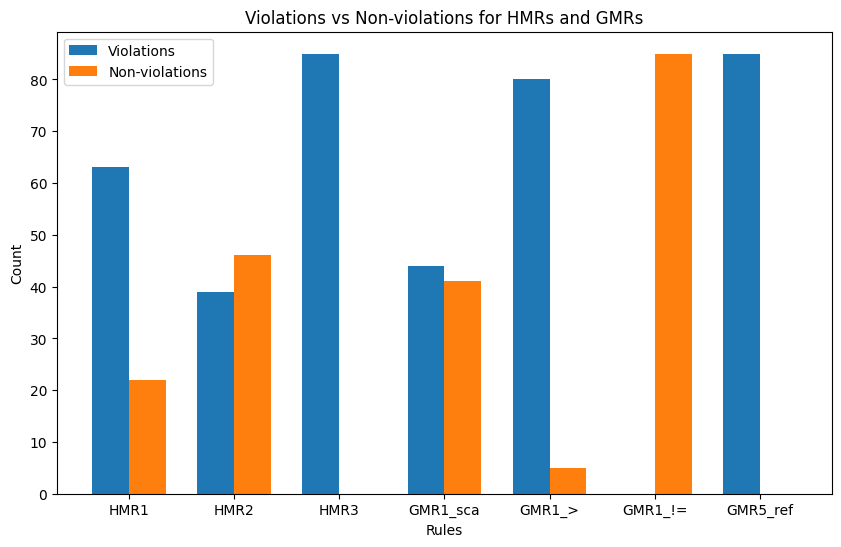

In [96]:
import matplotlib.pyplot as plt

# Data
rules = ['HMR1', 'HMR2', 'HMR3', 'GMR1_sca', 'GMR1_>', 'GMR1_!=', 'GMR5_ref']
violations = [63, 39, 85, 44, 80, 0, 85]
non_violations = [22, 46, 0, 41, 5, 85, 0]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(rules))
width = 0.35
ax.bar(x, violations, width, label='Violations')
ax.bar([i + width for i in x], non_violations, width, label='Non-violations')

# Adding labels
ax.set_xlabel('Rules')
ax.set_ylabel('Count')
ax.set_title('Violations vs Non-violations for HMRs and GMRs')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(rules)
ax.legend()

plt.show()

